In [3]:
import pandas as pd
import gender_guesser.detector as gender
d = gender.Detector()
d.get_gender("Dominique")

'andy'

In [5]:
df = pd.read_pickle('/Users/serenatheobald/Downloads/webscraping files/theses_fr_dataframe_total_with_authors_clean1.pickle')

In [7]:
df.head()

,url,title,author_name,author_id,date,summary,keywords,director_name,director_id,university_name,university_id,birth,sex,country,language,notes
0,1986BOR1D313,La stratégie d'intégration verticale dans les ...,Abdelaziz Ennamli,031050980,1986,Cette recherche porte sur l'etude de la strate...,"['Sciences de gestion', 'Instruments', 'Attent...",026957620,André Labourdette,Bordeaux 1,027548341,1954,Masculin,Maroc,français,Titulaire d'un doctorat de 3e cycle en science...
1,1994POIT4010,Le système d'innovation et de diffusion des no...,Bernadette Bac-Charry,,1994,Normaliser la comptabilite revient a simplifie...,"['Sciences de gestion', 'Instruments', 'Attent...",030473535,Jean-Louis Malo,Poitiers,026403765,NaN,,NaN,NaN,NaN
2,1997REN11027,Conditions d'application de la segmentation ma...,Augustin Anasse-Adja,114192790,1997,La pratique de la segmentation marketing est-e...,"['Sciences de gestion', 'Instruments', 'Attent...",031688314,Gérard Cliquet,Rennes 1,02778715X,,Masculin,France,français,Thèse soutenue en 1997 à Rennes
3,2011PEST0070,Relativité de la taille critique et stratégies...,René Santenac,166732095,13-12-2011,RESUME :Cette thèse a pour objet d'analyser et...,"['Sciences de gestion', 'Instruments', 'Attent...",083833471,Emmanuel Okamba,Paris Est,121855465,1967,Masculin,France,français,Auteur d'une thèse en Sciences de Gestion à Pa...
4,2006PA010047,Les déterminants de l'implication des jeunes d...,Issam Haidar,111866847,2006,Les jeunes diplômés qui arrivent actuellement ...,"['Sciences de gestion', 'Instruments', 'Attent...",030131367,Jean-François Amadieu,Paris 1,027361802,1975,Masculin,République arabe syrienne,français,Titulaire d'un doctorat en sciences de gestion...


In [4]:
df.sex.value_counts()

Masculin    3469
Féminin     2941
            1567
Name: sex, dtype: int64

In [100]:
import gender_guesser.detector as gender
import time
import requests

# Replace 'your-api-key' with your actual API key obtainable through https://gender-guesser.com/api/
api_key = "dd54431d029e34ded6e5c8532039bcc9"
url_template = "https://v2.namsor.com/NamSorAPIv2/api2/json/gender/{first_name}/{last_name}"

In [101]:
guesser = gender.Detector()
filtered_indices = df[df['sex'].isin(['','Inconnu','non applicable'])].index # Filter the DataFrame to include only rows with ' ', 'Inconnu', or 'non applicable' in the 'sex' column

def handle_special_cases(gender):           # Define the function to handle special cases and translate results to French
    if gender == 'female':
        return 'Féminin'
    elif gender == 'male':
        return 'Masculin'
    else:
        return gender
for index in filtered_indices:
    full_name = df.at[index, 'author_name']

    name_parts = full_name.split(maxsplit=1) if ' ' in full_name else (full_name, '') # Split into first and last names, ensuring a tuple with two values


    first_name = name_parts[0]
    last_name = name_parts[1] if len(name_parts) > 1 else ''  # Assign first and last names from the tuple

    # Construct the URL with the first and last name
    url = url_template.format(first_name=first_name, last_name=last_name)

    headers = {
        "X-API-KEY": api_key,
        "Accept": "application/json"
    }

    # Make the request to the NamSor API
    response = requests.get(url, headers=headers)

    if response.ok: #if response obtained, insert results into authors
        data = response.json()
        guessed_gender = handle_special_cases(data['likelyGender']) #likely gender comes from json file
        score = data['probabilityCalibrated']
        df.at[index, 'sex_annotated'] = guessed_gender
        df.at[index, 'gender_prob'] = score
        
        print(f"Name: {first_name} {last_name}, Guessed Gender: {guessed_gender},Score : {score}")
    else:
        print("The request failed with status:", response.status_code, response.text)

    time.sleep(1)  # Introduce a delay to avoid rate limiting


Name: Bernadette Bac-Charry, Guessed Gender: Féminin,Score : 0.9910174664714331
Name: Jamil Arida, Guessed Gender: Masculin,Score : 0.9834113208674516
Name: Hubert Tondeur, Guessed Gender: Masculin,Score : 0.985444924216639
Name: David Chelly, Guessed Gender: Masculin,Score : 0.9834429997655213
Name: David Petersen, Guessed Gender: Masculin,Score : 0.9810275652673671
Name: Raphael Dornier, Guessed Gender: Masculin,Score : 0.9881236390037548
Name: Henda El Gharbi, Guessed Gender: Féminin,Score : 0.9622351753081405
Name: Erik Honobé Hoang, Guessed Gender: Masculin,Score : 0.9886106095044211
Name: Bénédicte Grall (Doan), Guessed Gender: Féminin,Score : 0.9447185997776564
Name: Nicolas Antheaume, Guessed Gender: Masculin,Score : 0.9876945873401746
Name: Mahmoud Trabelsi, Guessed Gender: Masculin,Score : 0.994055316363403
Name: Anh-Tho Andres-Hoang, Guessed Gender: Masculin,Score : 0.551202577460317
Name: Pierre Astolfi, Guessed Gender: Masculin,Score : 0.983206567426959
Name: Raphaël Maucu

KeyboardInterrupt: 

In [ ]:
df['sex_annotated'].value_counts()

Masculin    37
Féminin     21
Name: sex_annotated, dtype: int64

In [ ]:
df['sex'].value_counts()

Masculin    3469
Féminin     2941
            1567
Name: sex, dtype: int64

In [ ]:
df['sex_combined'] = df['sex'].replace([''], pd.NA).fillna(df['sex_annotated'])

In [ ]:
df['sex_combined'].value_counts()

Masculin    4392
Féminin     3585
Name: sex_combined, dtype: int64

In [ ]:
df.to_pickle('authors_gender.pickle')

In [7]:
df = pd.read_pickle('authors_gender.pickle')

In [8]:
df

,url,title,author_name,author_id,date,summary,keywords,director_name,director_id,university_name,university_id,birth,sex,country,language,notes,sex_annotated,gender_prob,sex_combined
0,1986BOR1D313,La stratégie d'intégration verticale dans les ...,Abdelaziz Ennamli,031050980,1986,Cette recherche porte sur l'etude de la strate...,"['Sciences de gestion', 'Instruments', 'Attent...",026957620,André Labourdette,Bordeaux 1,027548341,1954,Masculin,Maroc,français,Titulaire d'un doctorat de 3e cycle en science...,NaN,NaN,Masculin
1,1994POIT4010,Le système d'innovation et de diffusion des no...,Bernadette Bac-Charry,,1994,Normaliser la comptabilite revient a simplifie...,"['Sciences de gestion', 'Instruments', 'Attent...",030473535,Jean-Louis Malo,Poitiers,026403765,NaN,,NaN,NaN,NaN,Féminin,0.991017,Féminin
2,1997REN11027,Conditions d'application de la segmentation ma...,Augustin Anasse-Adja,114192790,1997,La pratique de la segmentation marketing est-e...,"['Sciences de gestion', 'Instruments', 'Attent...",031688314,Gérard Cliquet,Rennes 1,02778715X,,Masculin,France,français,Thèse soutenue en 1997 à Rennes,NaN,NaN,Masculin
3,2011PEST0070,Relativité de la taille critique et stratégies...,René Santenac,166732095,13-12-2011,RESUME :Cette thèse a pour objet d'analyser et...,"['Sciences de gestion', 'Instruments', 'Attent...",083833471,Emmanuel Okamba,Paris Est,121855465,1967,Masculin,France,français,Auteur d'une thèse en Sciences de Gestion à Pa...,NaN,NaN,Masculin
4,2006PA010047,Les déterminants de l'implication des jeunes d...,Issam Haidar,111866847,2006,Les jeunes diplômés qui arrivent actuellement ...,"['Sciences de gestion', 'Instruments', 'Attent...",030131367,Jean-François Amadieu,Paris 1,027361802,1975,Masculin,République arabe syrienne,français,Titulaire d'un doctorat en sciences de gestion...,NaN,NaN,Masculin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,2005GRE21018,Les déterminants ou modérateurs de la relation...,Thi Thanh Huyen Vo,092079539,2005,La thèse étudie principalement les deux concep...,"['Sciences de gestion', 'Instruments', 'Attent...",029461219,Alain Jolibert,Université Pierre Mendès France (Grenoble ; 19...,02640432X,1977,Féminin,France,français,Docteur en Sciences de gestion,NaN,NaN,Féminin
7973,2015BORD0140,Le Business Model de l’entreprise transmise : ...,Alain Meiar,136911919,15-09-2015,Selon le rapport de la Commission Européenne (...,"['Sciences de gestion', 'Instruments', 'Attent...",050733117,Thierry Verstraete,Bordeaux,175206562,1986,Masculin,France,français,Titulaire d'un doctorat en Sciences de gestion...,NaN,NaN,Masculin
7974,2011CLF10356,Adoption de la banque en ligne : cas des entre...,Dorra Ghérib,18047250X,09-06-2011,Nous cherchons à étudier les banques adoptante...,"['Sciences de gestion', 'Instruments', 'Attent...",029139562,Pascal Pecquet,Clermont-Ferrand 1,028032829,,,Tunisie,français,Auteur d'une thèse de Doctorat en Sciences de ...,Féminin,0.984128,Féminin
7975,1995BOR40004,Stratégie et comportements financiers des entr...,Maïkolanché Mayaki,131884360,1995,Le but principal de l'étude est d'analyser les...,"['Sciences de gestion', 'Instruments', 'Attent...",028284194,Gérard Hirigoyen,Bordeaux 1,027548341,,Masculin,Pays inconnu,français,Titulaire d'un doctorat en Sciences de gestion...,NaN,NaN,Masculin


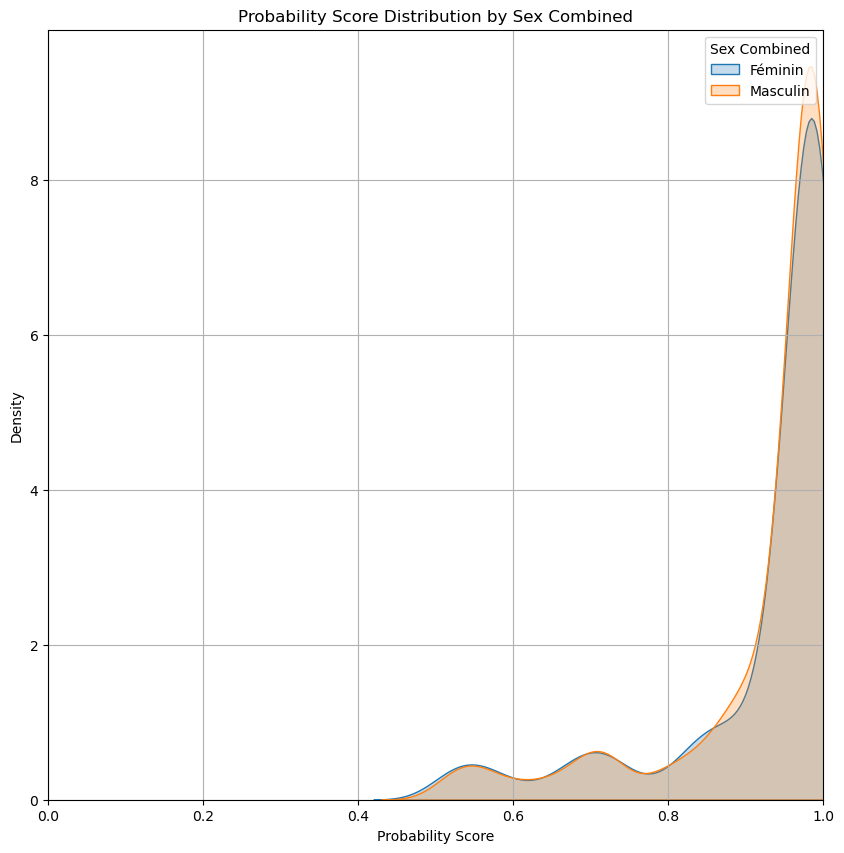

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df.dropna(subset=['gender_prob'])

# Creating a density plot for each 'sex_combined' category
plt.figure(figsize=(10, 10))
unique_sex_combined = df_filtered['sex_combined'].unique()
for sex in unique_sex_combined:
    subset = df_filtered[df_filtered['sex_combined'] == sex]
    # plots the kernel density estimate of the probability scores.
    # KDE is a way to estimate the probability density function (PDF) of a continuous random variable. 
    #represents the density of probability scores across different values.
    sns.kdeplot(subset['gender_prob'], label=sex, fill=True)

plt.title('Probability Score Distribution by Sex Combined')
plt.xlabel('Probability Score')
plt.xlim(0, 1)
plt.ylabel('Density') #the density value reflects the data's concentration at different probability scores on the x-axis.
plt.legend(title='Sex Combined')
plt.grid(True)
plt.show() 

In [73]:
df["gender_prob"].max()

KeyError: 'gender_prob'

In [ ]:
#create separate df with indivudals with probabiltiy < 0.8 (threshold)

In [11]:
threshold_df = df[df["gender_prob"] < 0.8]
threshold_df

,url,title,author_name,author_id,date,summary,keywords,director_name,director_id,university_name,university_id,birth,sex,country,language,notes,sex_annotated,gender_prob,sex_combined
61,2019PESC0028,Restructuration des entreprises publiques au V...,Anh-Tho Andres-Hoang,236941461,28-01-2019,La privatisation des entreprises publiques au ...,"['Sciences de gestion', 'Instruments', 'Attent...",030634040,Jean-David Avenel,Paris Est,190456396,1957,,Suisse,français,Auteur d'une thèse en Sciences de Gestion à Pa...,Masculin,0.551202,Masculin
141,1995POIT4004,Contribution à la connaissance du consommateur...,Assoulian Katcha Tchamsi,,1995,Dans les pays en voie de developpement en gene...,"['Sciences de gestion', 'Instruments', 'Attent...",026917998,Jean-Pierre Helfer,Poitiers,026403765,NaN,,NaN,NaN,NaN,Masculin,0.599142,Masculin
227,1991NICE0008,La stratégie de la publicité internationale et...,Woo-Chae Lee,219793395,1991,Avec l'uniformisation culturelle à laquelle no...,"['Sciences de gestion', 'Instruments', 'Attent...",029728584,André Boyer,Nice,026403498,,,,,Auteur d'une thèse en,Masculin,0.567614,Masculin
303,2005PA090046,Evaluation de l'efficacité de la technologie d...,Thu Huong Nguyen,10500796X,2005,L'évaluation de l'efficacité des investissemen...,"['Sciences de gestion', 'Instruments', 'Attent...",055777953,Albert David,Paris 9,027787109,1973,,France,français,Docteur en Sciences de gestion (Université Par...,Masculin,0.726109,Masculin
305,1987PA090021,Le modèle d'évaluation des actifs financiers à...,Nwogu Okere,033071926,1987,A cause de la nature dynamique des facteurs ré...,"['Sciences de gestion', 'Instruments', 'Attent...",026955857,Hubert de La Bruslerie,Paris 9,027787109,1956,,Nigéria,français,"Docteur ès-sciences de gestion (Paris 9, 1987)",Masculin,0.670202,Masculin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,2015PERP0014,La démarche qualité dans les établissements pr...,Seïve Damenou,187063915,02-07-2015,Au cœur des nouveaux paradigmes de l’enseignem...,"['Sciences de gestion', 'Instruments', 'Attent...",06027428X,Mohamed Benlahcen Tlemçani,Perpignan,026403692,1975,,Bénin,,Auteur d'une thèse en Sciences de gestion à Pe...,Féminin,0.553396,Féminin
7885,1987TOU10037,Une Application des systèmes-experts au diagno...,Juan-Ricardo Lerdon-Ferrada,032842333,1987,L'objectif fondamental du système expert Arfin...,"['Sciences de gestion', 'Instruments', 'Attent...",029294576,Calixte Couffin,Toulouse 1,026404354,1953,,Chili,français,Titulaire d'un doctorat de 3e cycle en science...,Masculin,0.624887,Masculin
7912,2022MULH5786,Understanding the fluctuations of perceived au...,Prihartomo Andimarjoko,267031947,28-04-2022,Le marketing du tourisme culturel est confront...,"['Sciences de gestion', 'Instruments', 'Attent...",076131564,Françoise Simon,Isabelle Barth,114174369,1969,,Pays inconnu,anglais,Auteur d'une thèse en Sciences de gestion à Mu...,Masculin,0.573155,Masculin
7954,1992MON20150,Conception et réalisation d'un modèle didactiq...,Claude Alia,,1992,L'objectif general de cette recherche est d'ac...,"['Sciences de gestion', 'Instruments', 'Attent...",060120215,Yves Dupuy,Montpellier 2,026404214,NaN,,NaN,NaN,NaN,Masculin,0.785365,Masculin


In [12]:
threshold_df2 = threshold_df[['title','author_name', 'author_id', 'gender_prob', 'sex_annotated']]
threshold_df2

,title,author_name,author_id,gender_prob,sex_annotated
61,Restructuration des entreprises publiques au V...,Anh-Tho Andres-Hoang,236941461,0.551202,Masculin
141,Contribution à la connaissance du consommateur...,Assoulian Katcha Tchamsi,,0.599142,Masculin
227,La stratégie de la publicité internationale et...,Woo-Chae Lee,219793395,0.567614,Masculin
303,Evaluation de l'efficacité de la technologie d...,Thu Huong Nguyen,10500796X,0.726109,Masculin
305,Le modèle d'évaluation des actifs financiers à...,Nwogu Okere,033071926,0.670202,Masculin
...,...,...,...,...,...
7883,La démarche qualité dans les établissements pr...,Seïve Damenou,187063915,0.553396,Féminin
7885,Une Application des systèmes-experts au diagno...,Juan-Ricardo Lerdon-Ferrada,032842333,0.624887,Masculin
7912,Understanding the fluctuations of perceived au...,Prihartomo Andimarjoko,267031947,0.573155,Masculin
7954,Conception et réalisation d'un modèle didactiq...,Claude Alia,,0.785365,Masculin


In [13]:
threshold_df2.to_excel("low_threshold.xlsx")

# Cleaning for LDA and STM


In [74]:
import pandas as pd
import re
from tqdm import tqdm
from ftfy import fix_text
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

In [75]:
experiences = pd.read_pickle("authors_gender.pickle")

In [76]:
experiences.to_csv("authors_gender.csv")

In [77]:
experiences['title_len'] = experiences['title'].apply(lambda x: len(str(x)))
experiences[['title_len']]


,title_len
0,92
1,195
2,134
3,112
4,64
...,...
7972,109
7973,160
7974,74
7975,97


In [78]:
# https://spacy.io/usage
import spacy
import spacy_transformers

nlp = spacy.load("fr_core_news_md")

custom_stop_words = ["de","d'"]

# Update the stop words in the spaCy model
def customize_stop_words(custom_stop_words):
    for word in custom_stop_words:
        nlp.vocab[word].is_stop = False

doc = nlp("""le système dinnovation et de diffusion de norme comptable et le changement dans le pratique comptable de p m e : étude exploratoire auprès de 76 entreprise de le région midi pyrénée
             d'integration p """)
print([(w.text, w.pos_) for w in doc])


[('le', 'DET'), ('système', 'NOUN'), ('dinnovation', 'NOUN'), ('et', 'CCONJ'), ('de', 'ADP'), ('diffusion', 'NOUN'), ('de', 'ADP'), ('norme', 'NOUN'), ('comptable', 'ADJ'), ('et', 'CCONJ'), ('le', 'DET'), ('changement', 'NOUN'), ('dans', 'ADP'), ('le', 'DET'), ('pratique', 'NOUN'), ('comptable', 'ADJ'), ('de', 'ADP'), ('p', 'ADJ'), ('m', 'NOUN'), ('e', 'PROPN'), (':', 'PUNCT'), ('étude', 'NOUN'), ('exploratoire', 'ADJ'), ('auprès', 'ADV'), ('de', 'ADP'), ('76', 'NUM'), ('entreprise', 'NOUN'), ('de', 'ADP'), ('le', 'DET'), ('région', 'NOUN'), ('midi', 'NOUN'), ('pyrénée', 'VERB'), ('\n             ', 'SPACE'), ("d'", 'ADP'), ('integration', 'NOUN'), ('p', 'NOUN')]


In [79]:
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

# Download the stopwords corpus
#nltk.download('stopwords')

#  can load English stopwords without encountering an error
#eng_stop = stopwords.words('french')
#eng_stopwords = stopwords.words('english')
eng_stopwords = set(stopwords.words('english'))

#french_stopwords = set(stopwords.words('french'))
eng_stopwords.update(['d'])
noisy_pos_tags = ["ADP", "CCONJ", "PUNCT", "DET","PROPN"]

In [26]:
#import re

#def preprocess_french_text(text):
    #Normalize apostrophe characters and separate contractions
#    text = text.replace("’", "")  # Replace curly apostrophes with straight ones if any
    # Expand contractions by adding a space after apostrophes within words
    #text = re.sub(r"\b(d|l|j|t|m|n|s|c)'\b", r'\1\' ', text)
#    return text

#def remove_stopwords(text, stopwords_set):
#    preprocessed_text = preprocess_french_text(text)
#    tokens = word_tokenize(preprocessed_text, language='french')
#    filtered_words = [word for word in tokens if word.lower() not in stopwords_set]
#    return ' '.join(filtered_words)


#texts = [
##    "le stratégie d'intégration vertical dans le moyen entreprise industriel ( m e i )"]

#clean_texts = [remove_stopwords(text, french_stopwords) for text in texts]
#clean_texts = [remove_stopwords(text, eng_stopwords) for text in texts]
#print(clean_texts)



["le stratégie d'intégration vertical dans le moyen entreprise industriel ( e )"]


In [80]:
from unidecode import unidecode

def remove_accents(input_str):
    return unidecode(input_str)

In [61]:
def is_noise(token):

    is_noise = False

    if token.pos_ in noisy_pos_tags: # pas les mots déterminants etc.
        is_noise = True
        
    elif token.is_stop == True: # pas de stop words
        is_noise = True
        
    #elif token.text in french_stopwords:  # pas de stop words anglais
    #    is_noise = True
        
    elif token.text in eng_stopwords:
        is_noise = True
    
    elif token.text in custom_stop_words:
        is_noise = True

    elif token.is_digit == True: # pas de chiffres
        is_noise = True

    #elif token.is_punct == True: # pas de ponctuations
    #    is_noise = True

    elif token.is_space == True: # pas d'espaces
        is_noise = True

    elif token.is_alpha == False: # que alpha numérisies
        is_noise = True

    return is_noise == True

        

In [81]:
# Filter out noisy tokens using the is_noise function
filtered_tokens = [token.text for token in doc if not is_noise(token)]
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['système', 'dinnovation', 'diffusion', 'norme', 'comptable', 'changement', 'pratique', 'comptable', 'p', 'étude', 'exploratoire', 'auprès', 'entreprise', 'région', 'midi', 'pyrénée', 'integration', 'p']


In [65]:
experiences['title_clean'] = ''

In [83]:
#nltk isn't working  
for index, row in experiences.iterrows():
    titleclean = []
    words_source = str(row['title'])
    words_source = words_source.lower()
    words_source = words_source.replace('\n', ' ').replace('\r', '') # remove line breaks
    words_source = words_source.replace ("-", " ").replace("'", "").replace(".","")
    words_source = words_source.replace ("cas", "")
    for stop_word in custom_stop_words:
        #want to delete custom words
        words_source = words_source.replace(stop_word, "")
    nlp_words = nlp(words_source)
    output = []
    output_str = ''
    for word in nlp_words:
        if not is_noise(word):
            output.append(word.lemma)
    if len(output) > 0:
        output_str = ' '.join(output)
    df.at[index,'title_clean'] = output_str
    print(output_str)

TypeError: sequence item 0: expected str instance, int found

In [84]:
for index, row in experiences.iterrows():
    title_clean = []
    words_source = str(row['title'])
    words_source = words_source.lower()
    words_source = words_source.replace('\n', ' ').replace('\r', '') # remove line breaks
    #words_source = remove_accents(words_source)  # Remove accents
    words_source =words_source.replace ("-", " ").replace("'", "").replace(".","")
    nlp_words = nlp(words_source)
    output = []
    output_str = ''
    for word in nlp_words:
        if not is_noise(word):
            output.append(word.lemma_)
    if len(output) > 2:
        output_str = ' '.join(output)
    experiences.at[index,'title_clean'] = output_str
    print(output_str)

stratégie dintégration vertical moyen entreprise industriel
système dinnovation diffusion norme comptable changement pratique comptable p étude exploratoire auprès entreprise région midi pyrénée
condition dapplication segmentation marketing contexte pays voie développement cas côte divoire
relativité taille critique stratégie performance organisation cas banque français
déterminant limplication jeune diplômé travail
processus normalisation processus dinstitutionalisation norme pratique
risque change valeur lentreprise
processus décision situation crise
cognitif emotional real estate investment
gestion risque professionnel lenjeu laccompagnement partir cas clinique psychiatrique
approche institutionnel linfluence sensibilité organisation cas ladoption pratique viser réduire infection nosocomial établissement soin français
sustainabl development strategic alliance four essays implication firms environmental performance cooperativ strategie
choix comptable matière détablissement compte co

In [89]:
experiences.sample(5)

,url,title,author_name,author_id,date,summary,keywords,director_name,director_id,university_name,...,birth,sex,country,language,notes,sex_annotated,gender_prob,sex_combined,title_len,title_clean
6806,2017PAUU2020,Stratégie et organisation des entreprises chin...,Ni Gao,224077589,21-12-2017,Cette thèse a pour objet d’effectuer une étude...,"['Sciences de gestion', 'Instruments', 'Attent...",167366947,Johannes Schaaper,Pau,...,1984,Féminin,Chine,français,Titulaire d'un doctorat en sciences de gestion...,NaN,NaN,Féminin,61,stratégie et organisation de entreprise chinoi...
7787,2000PA090052,Génération de la coopération dans l'organisati...,Stéphanie Dameron,123009979,2000,"Cette thèse vise à comprendre, à travers le ca...","['Sciences de gestion', 'Instruments', 'Attent...",029302129,Bernard de Montmorillon,Paris 9,...,1972,Féminin,France,français,Professeur à l'Université Paris Dauphine (en 2...,NaN,NaN,Féminin,74,génération de le coopération dans lorganisatio...
4604,2004LIMO0526,Influence du profil du dirigeant sur le type d...,Vincent Lagarde,163988005,2004,Les théories entrepreuneuriales peuvent apport...,"['Sciences de gestion', 'Instruments', 'Attent...",02832207X,Jean-Charles Mathé,Limoges,...,,Masculin,France,français,Maître de conférence en stratégie à l'IAE de L...,NaN,NaN,Masculin,115,influence de profil de dirigeant sur le type d...
1859,2019LYSE2018,Le branding territorial : une démarche d'attra...,Mohamed Berrada,238194051,08-03-2019,Le branding territorial est perçu aujourd’hui ...,"['Sciences de gestion', 'Instruments', 'Attent...",097698768,Laure Ambroise,Houcine Berbou,...,1988,,Maroc,français,Auteur d'une thèse en Sciences de gestion à Ly...,Masculin,0.994158,Masculin,113,le branding territorial : un démarche dattract...
412,2013CNAM0875,Origin and role of social networks : a Compara...,Manzoom Akhter,172564646,05-07-2013,L'augmentation du nombre des entreprises qui s...,"['Sciences de gestion', 'Instruments', 'Attent...",056607830,Christophe Estay,Yvon Pesqueux,...,1975,Masculin,Pakistan,anglais,Auteur d'une thèse en Sciences de gestion sout...,NaN,NaN,Masculin,100,origin and role of social networks : avoir com...


In [85]:
import gensim
from gensim.models import CoherenceModel, LdaModel, Phrases
from gensim.corpora import Dictionary   

In [86]:
texts = experiences.title_clean.to_list()
texts = [t.split() for t in texts]
texts[:5]

[['stratégie',
  'dintégration',
  'vertical',
  'moyen',
  'entreprise',
  'industriel'],
 ['système',
  'dinnovation',
  'diffusion',
  'norme',
  'comptable',
  'changement',
  'pratique',
  'comptable',
  'p',
  'étude',
  'exploratoire',
  'auprès',
  'entreprise',
  'région',
  'midi',
  'pyrénée'],
 ['condition',
  'dapplication',
  'segmentation',
  'marketing',
  'contexte',
  'pays',
  'voie',
  'développement',
  'cas',
  'côte',
  'divoire'],
 ['relativité',
  'taille',
  'critique',
  'stratégie',
  'performance',
  'organisation',
  'cas',
  'banque',
  'français'],
 ['déterminant', 'limplication', 'jeune', 'diplômé', 'travail']]

In [87]:
TOKEN_NO_BELLOW_FREQ   = 10
TOKEN_NO_ABOVE_PERCENT = 0.5

dictionary = Dictionary(texts)

# Filter out words that occur less than TOKEN_NO_BELLOW_FREQ documents,
# or more than TOKEN_NO_ABOVE_PERCENT% of the documents.b
dictionary.filter_extremes(no_below=TOKEN_NO_BELLOW_FREQ, no_above=TOKEN_NO_ABOVE_PERCENT)

In [88]:
texts = experiences.title_clean.to_list()
texts = [t.split() for t in texts]
texts[:10]

[['stratégie',
  'dintégration',
  'vertical',
  'moyen',
  'entreprise',
  'industriel'],
 ['système',
  'dinnovation',
  'diffusion',
  'norme',
  'comptable',
  'changement',
  'pratique',
  'comptable',
  'p',
  'étude',
  'exploratoire',
  'auprès',
  'entreprise',
  'région',
  'midi',
  'pyrénée'],
 ['condition',
  'dapplication',
  'segmentation',
  'marketing',
  'contexte',
  'pays',
  'voie',
  'développement',
  'cas',
  'côte',
  'divoire'],
 ['relativité',
  'taille',
  'critique',
  'stratégie',
  'performance',
  'organisation',
  'cas',
  'banque',
  'français'],
 ['déterminant', 'limplication', 'jeune', 'diplômé', 'travail'],
 ['processus',
  'normalisation',
  'processus',
  'dinstitutionalisation',
  'norme',
  'pratique'],
 ['risque', 'change', 'valeur', 'lentreprise'],
 ['processus', 'décision', 'situation', 'crise'],
 ['cognitif', 'emotional', 'real', 'estate', 'investment'],
 ['gestion',
  'risque',
  'professionnel',
  'lenjeu',
  'laccompagnement',
  'partir',

In [89]:
bigram = gensim.models.Phrases(texts, min_count= 5)

In [90]:
texts_bigram = [bigram[line] for line in texts]

In [91]:
texts_bigram[:10]

[['stratégie', 'dintégration', 'vertical', 'moyen_entreprise', 'industriel'],
 ['système',
  'dinnovation',
  'diffusion',
  'norme_comptable',
  'changement',
  'pratique',
  'comptable',
  'p',
  'étude_exploratoire',
  'auprès',
  'entreprise',
  'région',
  'midi',
  'pyrénée'],
 ['condition',
  'dapplication',
  'segmentation',
  'marketing',
  'contexte',
  'pays_voie',
  'développement',
  'cas',
  'côte_divoire'],
 ['relativité',
  'taille',
  'critique',
  'stratégie',
  'performance',
  'organisation',
  'cas',
  'banque',
  'français'],
 ['déterminant', 'limplication', 'jeune_diplômé', 'travail'],
 ['processus',
  'normalisation',
  'processus',
  'dinstitutionalisation',
  'norme',
  'pratique'],
 ['risque_change', 'valeur', 'lentreprise'],
 ['processus_décision', 'situation_crise'],
 ['cognitif', 'emotional', 'real', 'estate', 'investment'],
 ['gestion_risque',
  'professionnel',
  'lenjeu',
  'laccompagnement',
  'partir',
  'cas',
  'clinique',
  'psychiatrique']]

In [92]:
texts_bigram = [' '.join(t) for t in texts_bigram]

In [93]:
experiences['titles_clean_bigram'] = texts_bigram

In [94]:
experiences.sample(5)

,url,title,author_name,author_id,date,summary,keywords,director_name,director_id,university_name,...,sex,country,language,notes,sex_annotated,gender_prob,sex_combined,title_len,title_clean,titles_clean_bigram
5607,2005PA010035,Le comportement d'achat des clients profession...,Sébastien Soulez,091986869,2005,Cette thèse s'intéresse au comportement d'acha...,"['Sciences de gestion', 'Instruments', 'Attent...",026917998,Jean-Pierre Helfer,Paris 1,...,Masculin,France,français,"Docteur en gestion (Paris 1, 2005)",NaN,NaN,Masculin,116,comportement dachat client professionnel espac...,comportement_dachat client professionnel espac...
3335,2015NICE0016,L'effet de l'orientation marché sur l'établiss...,Romain Lazzarini,186312156,19-06-2015,L'orientation marché est une notion apparue da...,"['Sciences de gestion', 'Instruments', 'Attent...",029728584,André Boyer,Nice,...,Masculin,France,français,Auteur d'une thèse en Sciences de gestion à Ni...,NaN,NaN,Masculin,151,leffet lorientation marché létablissement stra...,leffet lorientation marché létablissement stra...
6307,2014PA090057,Le rôle de la source de financement dans le Bu...,Maazou Elhadji Issa,183458699,04-12-2014,L'objectif de notre thèse est d'étudier le Bus...,"['Sciences de gestion', 'Instruments', 'Attent...",029302129,Bernard de Montmorillon,Paris 9,...,Masculin,France,français,Docteur en Sciences de Gestion (Université Par...,NaN,NaN,Masculin,148,rôle source financement business model ouest a...,rôle source financement business_model ouest a...
2858,2008PA010063,Méthodes d'évaluation de la prime de terme des...,Jessica Fouilloux,073553387,2008,Les anticipations provenant de la courbe des t...,"['Sciences de gestion', 'Instruments', 'Attent...",026955857,Hubert de La Bruslerie,Paris 1,...,Féminin,France,français,Titulaire d'un mémoire de DEA en finance de ma...,NaN,NaN,Féminin,61,méthode dévaluation prime terme taux dintérêt,méthode dévaluation prime terme taux_dintérêt
4758,2015VERS003S,Le management des ressources humaines : pilota...,Eric Mainier,185257518,2015,Cette étude traitant du management des ressour...,"['Sciences de gestion', 'Instruments', 'Attent...",029433371,Louis Marmoz,Versailles-St Quentin en Yvelines,...,Masculin,France,français,Auteur d'une thèse de doctorat en sciences de ...,NaN,NaN,Masculin,130,management ressource humain pilotage qualifica...,management ressource_humain pilotage qualifica...


In [95]:
len(experiences)

7977

In [ ]:
#extract to csv for wordcloud in Rstudio
experiences.to_csv("exp_clean.csv")

# Thesis Data

In [11]:
import pandas as pd


In [13]:
df2 = pd.read_pickle('/Users/serenatheobald/Downloads/webscraping files/these_data.pickle')
df2

,accessible,auteur,cas,code_etab,date_soutenance,directeurs_these,discipline,ecoles_doctorales,embargo,etablissements_soutenance,...,partenaires_recherche,president_jury,rapporteurs,resumes,source,status,sujets,sujets_rameau,these_sur_travaux,titres
101,non,"{'nom': 'Carchano', 'prenom': 'Catherine', 'id...",None,AIX3,2001-01-01,"[{'nom': 'Batteau', 'prenom': 'Pierre', 'idref...",Sciences de gestion,None,None,"[{'nom': 'Aix-Marseille 3', 'idref': '02640315...",...,None,None,None,{'en': 'Some empirical studies showed that the...,None,soutenue,None,[Épargne-retraite -- Grande-Bretagne],non,{'en': 'Performance and consistency of perform...
216,non,"{'nom': 'Safavian-Martinon', 'prenom': 'Margue...",None,PA01,1998-01-01,"[{'nom': 'Rojot', 'prenom': 'Jacques', 'idref'...",Gestion,None,None,"[{'nom': 'Paris 1', 'idref': '027361802'}]",...,None,None,None,{'fr': 'Par rapport aux theories classiques (d...,None,soutenue,None,"[Professions -- France, Écoles de commerce -- ...",non,{'en': 'The relation between the diploma and t...
219,non,"{'nom': 'Sousa', 'prenom': 'Manuela de', 'idre...",None,ORLE,2004-01-01,"[{'nom': 'Gallais-Hamonno', 'prenom': 'Georges...",Sciences de gestion,None,None,"[{'nom': 'Orléans', 'idref': '026402971'}]",...,None,None,None,{'fr': 'Cette thèse cherche à mesurer la renta...,None,soutenue,None,"[Rentabilité, Exploitations agricoles -- Évalu...",non,{'fr': 'La rentabilité de long terme des terre...
224,non,"{'nom': 'Trébucq', 'prenom': 'Stéphane', 'idre...",None,BOR4,2000-01-01,"[{'nom': 'Hirigoyen', 'prenom': 'Gérard', 'idr...",Sciences de gestion,None,None,"[{'nom': 'Bordeaux 4', 'idref': '034137823'}]",...,None,"{'nom': 'Hirigoyen', 'prenom': 'Gérard', 'idre...","[{'nom': 'Amann', 'prenom': 'Bruno', 'idref': ...",{'fr': 'La thèse est consacrée à l'étude des c...,None,soutenue,None,"[Fusion d'entreprises -- France, Offres publiq...",non,{'fr': 'Conséquences des méthodes d'évaluation...
350,non,"{'nom': 'Dutrait Poulingue', 'prenom': 'Genevi...",None,CAEN,2009-01-01,"[{'nom': 'Badot', 'prenom': 'Olivier', 'idref'...",Sciences de gestion,None,None,"[{'nom': 'Caen', 'idref': '026403064'}]",...,None,None,None,{'en': 'The historiography of the Club of Mont...,None,soutenue,None,"[Apprentissage social, Gestion de projets, Com...",non,{'en': 'Historiography of a community of exper...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445322,oui,"{'nom': 'Roche', 'prenom': 'Alexis', 'idref': ...",cas1,LYO3,2013-03-12,"[{'nom': 'Zardet', 'prenom': 'Véronique', 'idr...",Sciences de gestion,[{'nom': 'École doctorale Sciences économiques...,None,"[{'nom': 'Lyon 3', 'idref': '026404494'}]",...,None,"{'nom': 'Brillet', 'prenom': 'Franck', 'idref'...","[{'nom': 'Scouarnec', 'prenom': 'Aline', 'idre...",{'en': 'Recognition affects every one in a lot...,star,soutenue,"{'fr': ['Reconnaissance', 'Performance', 'Sens...","[Stress lié au travail, Efficience (gestion), ...",non,{'fr': 'Reconnaissance et performance : propos...
445503,non,"{'nom': 'Makhlouf Khaddouma', 'prenom': 'Mouna...",cas5,PA02,2011-11-30,"[{'nom': 'Zghal', 'prenom': 'Mustapha', 'idref...",Sciences de gestion,[{'nom': 'École doctorale des sciences économi...,None,[{'nom': 'Université Tunis El Manar. Faculté d...,...,None,None,"[{'nom': 'Jallais', 'prenom': 'Joël', 'idref':...",{'en': 'This research is based on the fact tha...,star,soutenue,"{'fr': ['Surprise', 'Emotion', 'Persuasion pub...","[Publicité -- Taux de rendement, Persuasion (p...",non,{'en': 'Integration of the element of surprise...
445588,oui,"{'nom': 'Fustec', 'prenom': 'Alan', 'idref': '...",cas1,LYSE,2017-09-22,"[{'nom': 'Marion', 'prenom': 'Alain', 'idref':...",Sciences de gestion,[{'nom': 'École doctorale Sciences économiques...,None,"[{'nom': 'Lyon', 'idref': '190915757'}]",...,[{'nom': 'Université Jean Moulin (Lyon ; 1973-...,"{'nom': 'Wirtz', 'prenom': 'Peter', 'idref': '...","[{'nom': 'Bayle', 'prenom': 'Emmanuel', 'idref...",{'fr': 'La mesure de la val

In [43]:
df2 = pd.read_csv('/Users/serenatheobald/Downloads/webscraping files/theses-soutenues.csv')
df2.head()

/var/folders/d1/2xl9zr0s5y5_vtd44wwj7b7m0000gn/T/ipykernel_18129/316667556.py:1: DtypeWarning: Columns (4,13,16,17,18,19,20,21,23,24,26,27,31,32,33,38,39,40,41,43,46,47,52,53,55,56,66,69,72,75,76,77,78,79,80,81,82,83,89,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,109,116,119,122,123,124,125,126,127,128,129,130,132,133,134,135,136,139,141,142,143,144,145,146,147,148,149,155,156,157,158,159,160,161,162,164,165,166,167,168,169,170,171,172,173,175,176,177,178,179,180,181,182,183,184,186,187,188,189,190,191,192,193,194,195,197,198,199,200,201,208,209,210) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/serenatheobald/Downloads/webscraping files/theses-soutenues.csv')


,accessible,auteur.idref,auteur.nom,auteur.prenom,cas,code_etab,date_soutenance,directeurs_these.0.idref,directeurs_these.0.nom,directeurs_these.0.prenom,...,sujets_rameau.7,sujets_rameau.8,sujets_rameau.9,these_sur_travaux,titres.autre.0,titres.autre.1,titres.autre.2,titres.autre.3,titres.en,titres.fr
0,non,035294140,Quartararo,Juliette,NaN,PA06,1996-01-01,130245933,Kasztelan,Slavik,...,Sulfures métalliques,Catalyseurs -- Analyse,Hydrotraitement,non,NaN,NaN,NaN,NaN,NaN,Reactivite de sulfures mixtes supportes non co...
1,non,132450372,Kyselková,Martina,NaN,LYO1,2008-01-01,124874657,Moënne-Loccoz,Yvan,...,NaN,NaN,NaN,non,NaN,NaN,NaN,NaN,Caractérisation par puce à ADN taxonomique de ...,NaN
2,non,122277732,Skrzypczak,Alexandre,NaN,REN1,2007-01-01,068762852,Palicot,Jacques,...,NaN,NaN,NaN,non,NaN,NaN,NaN,NaN,Contribution to the study of the OFDM / OQAM a...,Contribution à l'étude des modulations multipo...
3,non,NaN,AMARGER,VERONIQUE,NaN,PA07,1993-01-01,089062388,L'Hoir,Alain,...,NaN,NaN,NaN,non,NaN,NaN,NaN,NaN,Optimization and comparison of self-aligned te...,Optimisation et comparaison de technologies au...
4,non,197128149,Catanzariti,Jean François,NaN,LIL2,1994-01-01,059910968,Delcambre,Bernard,...,NaN,NaN,NaN,non,NaN,NaN,NaN,NaN,NaN,Les troubles oculomoteurs dans la scoliose idi...


In [44]:

#  treat "Paris 1" and "Sorbonne Université" as the same
def normalize_establishment(name):
    if name in ['Paris 1', 'Sorbonne Université']:
        return 'Sorbonne Université'
    return name

# Normalize the 'code_etab' column
df2['code_etab_normalized'] = df2['code_etab'].apply(normalize_establishment)

# filter by French language theses based on the presence of a French title ('titres.fr')
df2_fr = df2[pd.notnull(df2['titres.fr'])]

df2_fr

,accessible,auteur.idref,auteur.nom,auteur.prenom,cas,code_etab,date_soutenance,directeurs_these.0.idref,directeurs_these.0.nom,directeurs_these.0.prenom,...,sujets_rameau.8,sujets_rameau.9,these_sur_travaux,titres.autre.0,titres.autre.1,titres.autre.2,titres.autre.3,titres.en,titres.fr,code_etab_normalized
0,non,035294140,Quartararo,Juliette,NaN,PA06,1996-01-01,130245933,Kasztelan,Slavik,...,Catalyseurs -- Analyse,Hydrotraitement,non,NaN,NaN,NaN,NaN,NaN,Reactivite de sulfures mixtes supportes non co...,PA06
2,non,122277732,Skrzypczak,Alexandre,NaN,REN1,2007-01-01,068762852,Palicot,Jacques,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Contribution to the study of the OFDM / OQAM a...,Contribution à l'étude des modulations multipo...,REN1
3,non,NaN,AMARGER,VERONIQUE,NaN,PA07,1993-01-01,089062388,L'Hoir,Alain,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Optimization and comparison of self-aligned te...,Optimisation et comparaison de technologies au...,PA07
4,non,197128149,Catanzariti,Jean François,NaN,LIL2,1994-01-01,059910968,Delcambre,Bernard,...,NaN,NaN,non,NaN,NaN,NaN,NaN,NaN,Les troubles oculomoteurs dans la scoliose idi...,LIL2
5,non,095131507,Michaud,Alexis,NaN,PA03,2005-01-01,068267002,Vaissière,Jacqueline,...,NaN,NaN,non,NaN,NaN,NaN,NaN,A comparison of the prosody of tone languages ...,Prosodie de langues à tons (naxi et vietnamien...,PA03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445825,non,184214556,Devoucoux,Pierrick,cas2,POIT,2014-10-10,058605843,Bretagnolle,Vincent,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Consequences and predictable impacts of a majo...,Conséquences et impacts prévisibles d'une pert...,POIT
445826,oui,135354846,Chernov,Konstantin Grigorievich,cas1,EVRY,2008-12-05,081161328,Curmi,Patrick,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Interplay of YB-1 between tubulin and mRNA,Interaction de YB-1 avec la tubuline et l'ARN ...,EVRY
445827,oui,137825765,García Martinez,Marta,cas1,INPT,2009-01-19,033123705,Poinsot,Thierry,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Development and validation of the Euler-Lagran...,Développement et validation du formalisme Eule...,INPT
445828,oui,136553915,Iliopulos,Eleni,cas1,EVRY,2008-12-01,136554806,Ascari,Guido,...,NaN,NaN,non,NaN,NaN,NaN,NaN,External imbalances and capital flows,Déséquilibres extérieurs et flux de capitaux,EVRY


In [59]:
# Columns to check for being non-empty
print(df2_fr.columns.tolist())
columns_to_check = ['titres.fr', 'resumes.fr', 'date_soutenance']

df_filtered = df2_fr.dropna(subset=columns_to_check)
df_filtered


['accessible', 'auteur.idref', 'auteur.nom', 'auteur.prenom', 'cas', 'code_etab', 'date_soutenance', 'directeurs_these.0.idref', 'directeurs_these.0.nom', 'directeurs_these.0.prenom', 'directeurs_these.1.idref', 'directeurs_these.1.nom', 'directeurs_these.1.prenom', 'directeurs_these.2.idref', 'directeurs_these.2.nom', 'directeurs_these.2.prenom', 'directeurs_these.3.idref', 'directeurs_these.3.nom', 'directeurs_these.3.prenom', 'directeurs_these.4.idref', 'directeurs_these.4.nom', 'directeurs_these.4.prenom', 'directeurs_these.5.idref', 'directeurs_these.5.nom', 'directeurs_these.5.prenom', 'directeurs_these.6.idref', 'directeurs_these.6.nom', 'directeurs_these.6.prenom', 'discipline', 'ecoles_doctorales.0.idref', 'ecoles_doctorales.0.nom', 'ecoles_doctorales.1.idref', 'ecoles_doctorales.1.nom', 'embargo', 'etablissements_soutenance.0.idref', 'etablissements_soutenance.0.nom', 'etablissements_soutenance.1.idref', 'etablissements_soutenance.1.nom', 'etablissements_soutenance.2.idref', 

,accessible,auteur.idref,auteur.nom,auteur.prenom,cas,code_etab,date_soutenance,directeurs_these.0.idref,directeurs_these.0.nom,directeurs_these.0.prenom,...,sujets_rameau.8,sujets_rameau.9,these_sur_travaux,titres.autre.0,titres.autre.1,titres.autre.2,titres.autre.3,titres.en,titres.fr,code_etab_normalized
0,non,035294140,Quartararo,Juliette,NaN,PA06,1996-01-01,130245933,Kasztelan,Slavik,...,Catalyseurs -- Analyse,Hydrotraitement,non,NaN,NaN,NaN,NaN,NaN,Reactivite de sulfures mixtes supportes non co...,PA06
2,non,122277732,Skrzypczak,Alexandre,NaN,REN1,2007-01-01,068762852,Palicot,Jacques,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Contribution to the study of the OFDM / OQAM a...,Contribution à l'étude des modulations multipo...,REN1
3,non,NaN,AMARGER,VERONIQUE,NaN,PA07,1993-01-01,089062388,L'Hoir,Alain,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Optimization and comparison of self-aligned te...,Optimisation et comparaison de technologies au...,PA07
5,non,095131507,Michaud,Alexis,NaN,PA03,2005-01-01,068267002,Vaissière,Jacqueline,...,NaN,NaN,non,NaN,NaN,NaN,NaN,A comparison of the prosody of tone languages ...,Prosodie de langues à tons (naxi et vietnamien...,PA03
6,non,NaN,SCHIFANO,ELISA,NaN,PA11,1994-01-01,NaN,LABAUNE,C.,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Experimental study of stimulated backward bril...,Etude experimentale de la retrodiffusion brill...,PA11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445825,non,184214556,Devoucoux,Pierrick,cas2,POIT,2014-10-10,058605843,Bretagnolle,Vincent,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Consequences and predictable impacts of a majo...,Conséquences et impacts prévisibles d'une pert...,POIT
445826,oui,135354846,Chernov,Konstantin Grigorievich,cas1,EVRY,2008-12-05,081161328,Curmi,Patrick,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Interplay of YB-1 between tubulin and mRNA,Interaction de YB-1 avec la tubuline et l'ARN ...,EVRY
445827,oui,137825765,García Martinez,Marta,cas1,INPT,2009-01-19,033123705,Poinsot,Thierry,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Development and validation of the Euler-Lagran...,Développement et validation du formalisme Eule...,INPT
445828,oui,136553915,Iliopulos,Eleni,cas1,EVRY,2008-12-01,136554806,Ascari,Guido,...,NaN,NaN,non,NaN,NaN,NaN,NaN,External imbalances and capital flows,Déséquilibres extérieurs et flux de capitaux,EVRY


In [54]:
# Sort the filtered DataFrame by 'code_etab_normalized'
df_regrouped = df_filtered.sort_values(by='code_etab_normalized')
new_df = df_regrouped[df_regrouped['discipline'].isin(["Sciences de gestion","Gestion","Sciences de Gestion"])]
# Reset index for cleanliness
new_df.reset_index(drop=True, inplace=True)
new_df

,accessible,auteur.idref,auteur.nom,auteur.prenom,cas,code_etab,date_soutenance,directeurs_these.0.idref,directeurs_these.0.nom,directeurs_these.0.prenom,...,sujets_rameau.8,sujets_rameau.9,these_sur_travaux,titres.autre.0,titres.autre.1,titres.autre.2,titres.autre.3,titres.en,titres.fr,code_etab_normalized
0,oui,183678648,Colon,Marine,cas1,AGPT,2014-12-02,084254122,Nakhla,Michel,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Performance contracts in the Ugandan urban wat...,Les contrats de performance dans le secteur de...,AGPT
1,oui,12403375X,Bouteloup,Claire,cas1,AGPT,2015-11-30,02702461X,Mermet,Laurent,...,NaN,NaN,non,NaN,NaN,NaN,NaN,To act for the acknowledgment of the ecologica...,Agir pour la reconnaissance du dommage écologi...,AGPT
2,oui,203107691,Feger,Clément,cas1,AGPT,2016-02-17,02702461X,Mermet,Laurent,...,NaN,NaN,non,NaN,NaN,NaN,NaN,New management accounting for ecosystems. An a...,Nouvelles comptabilités au service des écosyst...,AGPT
3,non,133494691,Houdet,Joël,NaN,AGPT,2010-01-01,088705218,Trommetter,Michel,...,NaN,NaN,non,NaN,NaN,NaN,NaN,"Firms, biodiversity and ecosystem services. Wh...","Entreprises, biodiversité et services écosysté...",AGPT
4,oui,25022738X,Rabaud,Suzanne,cas1,AGPT,2016-02-15,02702461X,Mermet,Laurent,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Indicators of biodiversity between knowledge a...,Les indicateurs de biodiversité entre connaiss...,AGPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,non,123531136,Pierre-Jean,Pierre,NaN,VERS,2006-01-01,028809750,Hermel,Philippe,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Modernize Social Security and develop human re...,Modernisation de l'assurance maladie et dévelo...,VERS
7304,non,142938386,Gabourin,Isabelle,NaN,VERS,2008-01-01,028809777,Bartoli,Annie,...,NaN,NaN,non,NaN,NaN,NaN,NaN,"About PSPH hospitals (in France, private non-p...",De l'hybridité des hôpitaux PSPH (établissemen...,VERS
7305,non,186139772,Hannachi,Yacine,NaN,VERS,2014-01-01,028809750,Hermel,Philippe,...,NaN,NaN,non,NaN,NaN,NaN,NaN,The impact of the learning organization on pro...,L’ impact du fonctionnement en entreprise appr...,VERS
7306,non,143141732,Kaambi,Abdel-Latuf,NaN,VERS,2009-01-01,028809750,Hermel,Philippe,...,NaN,NaN,non,NaN,NaN,NaN,NaN,Quality and performance: cross approaches of t...,Qualité et performance : approches croisées de...,VERS
